# D - Data Wrangling

Environment für dieses Notebook: `ads-ml-light` (*requirements-py3.11-ads-ml-light.txt*).

## Daten einlesen

In [1]:
from repml.datasets.trees_fra import read_trees_fra

data = read_trees_fra()

In [2]:
data.tail()

,baumnummer,hochwert,rechtswert,gattungart,gattung,ga_lang,kr_durchm,st_umfang,gebiet,strasse,standort,baumhoehe,st_durchm,pflanzjahr,baum_statu,kr_r
159182,43/B,5559413.8,478440.3,G0467,Prunus,"Prunus cerasifera -Nigra-, Blut-Pflaume",6.0,79.0,Straßen,Massbornstrasse,NaN,7,25,2000,NaN,3.0
159183,43/C,5559410.7,478439.1,G0467,Prunus,"Prunus cerasifera -Nigra-, Blut-Pflaume",2.0,31.0,Straßen,Massbornstrasse,NaN,0,10,2010,NaN,1.0
159184,43/D,5559407.3,478437.3,G0497,Prunus,"Prunus species, Kirsche",4.0,79.0,Straßen,Massbornstrasse,NaN,6,25,2000,NaN,2.0
159185,42,5555665.9,478257.5,G0625,Styphnolobium,"Styphnolobium japonicum, Schnurbaum",10.0,220.0,Grünanlagen,Karl-Kirchner-Siedlung,NaN,9,70,2011,NaN,5.0
159186,45,5555677.8,478319.7,G0072,Acer,"Acer saccharinum, Silber-Ahorn",12.0,0.0,Grünanlagen,Karl-Kirchner-Siedlung,NaN,12,0,2002,NaN,6.0


In [3]:
data.isna().sum()

baumnummer         0
hochwert           0
rechtswert         0
gattungart         5
gattung            0
ga_lang            0
kr_durchm          0
st_umfang          0
gebiet             0
strasse            0
standort       99063
baumhoehe          0
st_durchm          0
pflanzjahr         0
baum_statu    158355
kr_r               0
dtype: int64

## Target Variable

In [4]:
tree_counts = data["gattung"].value_counts()
rare_trees = tree_counts[tree_counts < 100].index.to_list()

In [5]:
print("Es gibt", len(rare_trees), "seltene Gattungen.")
print(rare_trees[:10])

Es gibt 88 seltene Gattungen.
['Cedrus', 'Sambucus', 'Zelkova', 'Gymnocladus', 'Cercis', 'Sequoiadendron', 'Buxus', 'Tetradium', 'Cercidiphyllum', 'Cryptomeria']


In [6]:
data["gattung"] = data["gattung"].astype("object")
data.loc[data.query(f"gattung == @rare_trees").index, "gattung"] = "rare"
data["gattung"] = data["gattung"].astype("category")

## Trainings- und Testdaten

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [8]:
import pandas as pd

train_dist = pd.DataFrame(train_data["gattung"].value_counts() / len(train_data))
train_dist.columns = ["gattung_train_perc"]

In [9]:
train_dist[:5]

,gattung_train_perc
gattung,
Acer,0.222681
Tilia,0.093947
Carpinus,0.086833
Quercus,0.082059
Platanus,0.057637


In [10]:
test_dist = pd.DataFrame(test_data["gattung"].value_counts() / len(test_data))
test_dist.columns = ["gattung_test_perc"]

In [11]:
dist = train_dist.merge(test_dist, left_index=True, right_index=True)
dist["diff"] = (dist["gattung_train_perc"] - dist["gattung_test_perc"]).abs()

In [12]:
dist.sort_values(by="gattung_train_perc", ascending=False)[:20]

,gattung_train_perc,gattung_test_perc,diff
gattung,,,
Acer,0.222681,0.225555,0.002874
Tilia,0.093947,0.093759,0.000188
Carpinus,0.086833,0.087163,0.000330
Quercus,0.082059,0.082608,0.000550
Platanus,0.057637,0.057417,0.000220
Fraxinus,0.044979,0.043095,0.001885
Prunus,0.040959,0.040645,0.000314
Aesculus,0.040205,0.039859,0.000346
Taxus,0.032501,0.033357,0.000856


In [13]:
train_data, test_data = train_test_split(
    data, test_size=0.2, random_state=42, stratify=data["gattung"]
)

In [14]:
train_dist = pd.DataFrame(train_data["gattung"].value_counts() / len(train_data))
train_dist.columns = ["gattung_train_perc"]

In [15]:
test_dist = pd.DataFrame(test_data["gattung"].value_counts() / len(test_data))
test_dist.columns = ["gattung_test_perc"]

In [16]:
dist = train_dist.merge(test_dist, left_index=True, right_index=True)
dist["diff"] = (dist["gattung_train_perc"] - dist["gattung_test_perc"]).abs()

In [17]:
dist.sort_values(by="gattung_train_perc", ascending=False)[:20]

,gattung_train_perc,gattung_test_perc,diff
gattung,,,
Acer,0.223254,0.223262,0.000008
Tilia,0.093908,0.093916,0.000008
Carpinus,0.086904,0.086880,0.000024
Quercus,0.082169,0.082169,0.000000
Platanus,0.057590,0.057606,0.000016
Fraxinus,0.044602,0.044602,0.000000
Prunus,0.040896,0.040896,0.000000
Aesculus,0.040134,0.040142,0.000008
Taxus,0.032674,0.032666,0.000008


In [18]:
num_features = ["kr_durchm", "baumhoehe", "st_durchm", "pflanzjahr"]
cat_features = ["gebiet", "baum_statu"]

y = ["gattung"]
X = [*num_features, *cat_features]

## Transformationen

### One Hot Encoding

#### "Klassisch" mit Numpy Output

In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe_ft = OneHotEncoder(sparse_output=False).fit_transform(train_data[cat_features])
ohe_ft

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### "Effizient" als Sparse Matrix

In [20]:
ohe_ft = OneHotEncoder(sparse_output=True).fit_transform(train_data[cat_features])
ohe_ft

<127348x118 sparse matrix of type '<class 'numpy.float64'>'
	with 254696 stored elements in Compressed Sparse Row format>

In [21]:
ohe_ft[:10].toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### "Neu" - jetzt auch als Pandas Dataframe

In [22]:
from sklearn import set_config

set_config(transform_output="pandas")

In [23]:
ohe_ft = OneHotEncoder(sparse_output=False).fit_transform(X=train_data[cat_features])
ohe_ft.iloc[:, :5]

,gebiet_25 Amt für Bau und Immobilien,gebiet_40 Stadtschulamt,gebiet_41 Kulturamt,gebiet_48 Kita Frankfurt,gebiet_51 Jugend- und Sozialamt
90401,0.0,0.0,0.0,0.0,0.0
56970,0.0,0.0,0.0,0.0,0.0
97736,0.0,0.0,0.0,0.0,0.0
44342,0.0,0.0,0.0,0.0,0.0
92838,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
137925,0.0,0.0,0.0,0.0,0.0
135982,0.0,0.0,0.0,0.0,0.0
73639,0.0,0.0,0.0,0.0,0.0
94076,0.0,0.0,0.0,0.0,0.0


### Kombinierte Transformationen

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    remainder="drop",
    transformers=[
        ("std_scaler", StandardScaler(), num_features),
        ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), cat_features),
    ],
)

In [25]:
ct

ColumnTransformer(transformers=[('std_scaler', StandardScaler(),
                                 ['kr_durchm', 'baumhoehe', 'st_durchm',
                                  'pflanzjahr']),
                                ('ohe',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['gebiet', 'baum_statu'])])

In [26]:
ct_transformed = ct.fit_transform(X=train_data[X])
ct_transformed

,std_scaler__kr_durchm,std_scaler__baumhoehe,std_scaler__st_durchm,std_scaler__pflanzjahr,ohe__gebiet_25 Amt für Bau und Immobilien,ohe__gebiet_40 Stadtschulamt,ohe__gebiet_41 Kulturamt,ohe__gebiet_48 Kita Frankfurt,ohe__gebiet_51 Jugend- und Sozialamt,ohe__gebiet_52 Sportamt,...,ohe__gebiet_Spielplätze,ohe__gebiet_Sportparkstadion,ohe__gebiet_Straßen,ohe__gebiet_Wald,ohe__gebiet_Waldspielpark,ohe__gebiet_Zoologischer Garten,ohe__baum_statu_H,ohe__baum_statu_N,ohe__baum_statu_W,ohe__baum_statu_nan
90401,-0.519508,-0.445393,-0.125193,0.211658,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56970,0.718360,-0.608216,-0.125193,-0.377052,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97736,-1.262228,-1.422329,-1.204731,0.839615,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44342,-1.262228,-1.259506,-1.204731,0.878862,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
92838,0.223213,-0.608216,-0.600190,0.015421,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137925,1.213507,0.043075,1.299798,-0.494794,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
135982,-1.262228,-1.259506,-1.118368,1.428325,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73639,0.718360,0.531543,-0.038830,0.015421,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94076,-0.519508,-1.096684,-0.816098,0.918110,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Zwischenergebnis (Decision Tree Classifier)

In [27]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42, min_samples_split=20)

### Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=clf, X=ct.fit_transform(train_data[X]), y=train_data[y], cv=5)

array([0.37377307, 0.36957205, 0.37004319, 0.37787114, 0.37123562])

### Test Score

In [29]:
clf.fit(X=ct.transform(train_data[X]), y=train_data[y])

DecisionTreeClassifier(min_samples_split=20, random_state=42)

Mean accuracy

In [30]:
clf.score(X=ct.transform(test_data[X]), y=test_data[y])

0.37836479567798476

F1 score

In [33]:
from sklearn.metrics import f1_score

y_pred = clf.predict(ct.transform(test_data[X]))
f1_score(y_true=test_data[y], y_pred=y_pred, average="macro")

0.2664431500203502

## Custom Transformer

Um Fehler zu vermeiden: Test-Driven Development!

### TDD Step 1: Erwartete Ergebnisse formulieren

In [34]:
test_case = pd.DataFrame(
    {
        "kr_durchm": [4, 1, 6],
        "baumhoehe": [5, 2, 15],
        "expected": [62.83185307, 1.570796327, 424.1150082],
    }
)
test_case

,kr_durchm,baumhoehe,expected
0,4,5,62.831853
1,1,2,1.570796
2,6,15,424.115008


### TDD Step 2: Feature entwickeln

In [35]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin


class CombinedFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names_in_ = None

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        self.feature_names_in_ = df.columns.tolist()
        # volume as a sphere
        # volume = (4 / 3) * np.pi * pow(df["kr_durchm"] / 2, 3)
        # volume as a cylinder
        volume = np.pi * pow(df["kr_durchm"] / 2, 2) * df["baumhoehe"]

        return np.c_[X, volume]

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            input_features = self.feature_names_in_
        return np.array([*input_features, "cfa_volume"])

### TDD Step 3: Test ausführen

In [36]:
test_result = CombinedFeatureAdder().fit_transform(X=test_case[["kr_durchm", "baumhoehe"]])
test_result

,kr_durchm,baumhoehe,cfa_volume
0,4.0,5.0,62.831853
1,1.0,2.0,1.570796
2,6.0,15.0,424.115008


In [37]:
test_case["expected"]

0     62.831853
1      1.570796
2    424.115008
Name: expected, dtype: float64

In [38]:
assert np.allclose(test_result.iloc[:, 2], test_case["expected"].to_numpy())

In [39]:
cmb_feature_adder = CombinedFeatureAdder()
ret = cmb_feature_adder.fit_transform(X=train_data[["kr_durchm", "baumhoehe"]])
ret

,kr_durchm,baumhoehe,cfa_volume
90401,5.0,10.0,196.349541
56970,10.0,9.0,706.858347
97736,2.0,4.0,12.566371
44342,2.0,5.0,15.707963
92838,8.0,9.0,452.389342
...,...,...,...
137925,12.0,13.0,1470.265362
135982,2.0,5.0,15.707963
73639,10.0,16.0,1256.637061
94076,5.0,6.0,117.809725


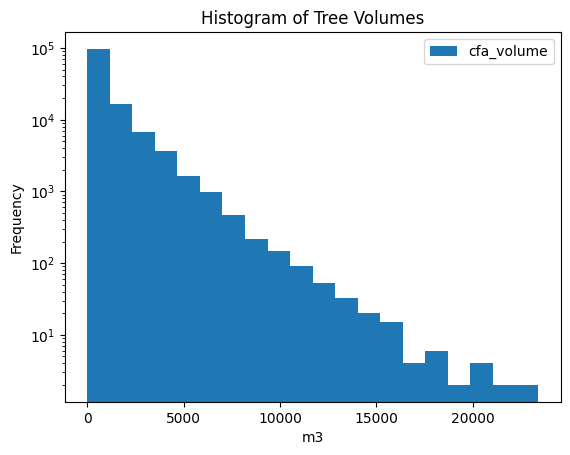

In [40]:
fig = pd.DataFrame(ret.iloc[:, 2]).plot.hist(
    title="Histogram of Tree Volumes", bins=20, logy=True, xlabel="m3"
)

## Multi-step Pipeline

In [41]:
from sklearn.pipeline import Pipeline

num_step = Pipeline(
    steps=[
        ("attr_add", CombinedFeatureAdder()),
        ("std_scaler", StandardScaler()),
    ]
)

In [42]:
prep_steps = ColumnTransformer(
    transformers=[
        ("num", num_step, num_features),
        ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), cat_features),
    ],
    remainder="drop",
)

In [43]:
pipeline = Pipeline(
    steps=[
        ("preprocessing", prep_steps),
        ("model", DecisionTreeClassifier(random_state=42, min_samples_split=20)),
    ]
)

In [44]:
pipeline.fit(X=train_data[X], y=train_data[y])

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('attr_add',
                                                                   CombinedFeatureAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['kr_durchm', 'baumhoehe',
                                                   'st_durchm', 'pflanzjahr']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gebiet', 'baum_statu'])])),
                ('model',
                 DecisionTreeClassifier(min_samples_split=20,
                                        random_state=42))])

In [45]:
cross_val_score(estimator=pipeline, X=train_data[X], y=train_data[y], cv=5)

array([0.37334119, 0.36929721, 0.36800157, 0.37174604, 0.3691154 ])

In [46]:
pipeline.score(X=test_data[X], y=test_data[y])

0.37845902566196565

In [49]:
pipeline[:-1].get_feature_names_out()

array(['num__kr_durchm', 'num__baumhoehe', 'num__st_durchm',
       'num__pflanzjahr', 'num__cfa_volume',
       'ohe__gebiet_25 Amt für Bau und Immobilien',
       'ohe__gebiet_40 Stadtschulamt', 'ohe__gebiet_41 Kulturamt',
       'ohe__gebiet_48 Kita Frankfurt',
       'ohe__gebiet_51 Jugend- und Sozialamt', 'ohe__gebiet_52 Sportamt',
       'ohe__gebiet_57 Kommunale Kinder-, Jugend- und Familienhilfe',
       'ohe__gebiet_67 Mietliegenschaften',
       'ohe__gebiet_Ausgleichsfläche', 'ohe__gebiet_Friedhof',
       'ohe__gebiet_Grünanlagen', 'ohe__gebiet_Klinikum Höchst',
       'ohe__gebiet_Park', 'ohe__gebiet_Parkplätze',
       'ohe__gebiet_Privatfläche', 'ohe__gebiet_R 0006',
       'ohe__gebiet_R 0007', 'ohe__gebiet_R 0008', 'ohe__gebiet_R 0009',
       'ohe__gebiet_R 0013', 'ohe__gebiet_R 0014', 'ohe__gebiet_R 0015',
       'ohe__gebiet_R 0016', 'ohe__gebiet_R 0017', 'ohe__gebiet_R 0018',
       'ohe__gebiet_R 0019', 'ohe__gebiet_R 0020', 'ohe__gebiet_R 0023',
       'ohe__gebi

## Dimensionsreduktion

Zur Veranschaulichung der Features schauen wir uns das Ergebnis der Transformation mit One-Hot-Encoding an.

In [50]:
steps = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(sparse_output=False), cat_features),
    ]
)

In [51]:
steps.fit_transform(X=train_data[cat_features])

,ohe__gebiet_25 Amt für Bau und Immobilien,ohe__gebiet_40 Stadtschulamt,ohe__gebiet_41 Kulturamt,ohe__gebiet_48 Kita Frankfurt,ohe__gebiet_51 Jugend- und Sozialamt,ohe__gebiet_52 Sportamt,"ohe__gebiet_57 Kommunale Kinder-, Jugend- und Familienhilfe",ohe__gebiet_67 Mietliegenschaften,ohe__gebiet_Ausgleichsfläche,ohe__gebiet_Friedhof,...,ohe__gebiet_Spielplätze,ohe__gebiet_Sportparkstadion,ohe__gebiet_Straßen,ohe__gebiet_Wald,ohe__gebiet_Waldspielpark,ohe__gebiet_Zoologischer Garten,ohe__baum_statu_H,ohe__baum_statu_N,ohe__baum_statu_W,ohe__baum_statu_nan
90401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
92838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
135982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
94076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Welche Dimensionen haben die kategorischen Spalten nach der Transformation?

In [52]:
pre_transform = train_data[cat_features].shape[1]
after_transform = steps.transform(X=train_data[cat_features]).shape[1]

In [53]:
print(f"Vor der Transformation gab es {pre_transform} Features, danach {after_transform}!")

Vor der Transformation gab es 2 Features, danach 118!


Wir versuchen die hohe Anzahl neuer Features zu reduzieren.

## PCA

Was ist PCA? Eine sehr kurze Erläuterung: https://stats.stackexchange.com/a/140579

### Wie viele Komponenten?

In [54]:
from sklearn.decomposition import PCA

components_evaluation = 25
pca = PCA(n_components=components_evaluation)
pca.fit_transform(X=steps.fit_transform(train_data[cat_features]))

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24
90401,0.706395,-0.287176,-0.051402,-0.037613,-0.005356,-0.009347,-0.004170,-0.001287,-0.008237,-0.001717,...,-0.000139,0.002148,-0.000135,-0.000091,-0.000322,0.000298,8.796578e-08,0.000027,6.397480e-07,0.000003
56970,0.706395,-0.287176,-0.051402,-0.037613,-0.005356,-0.009347,-0.004170,-0.001287,-0.008237,-0.001717,...,-0.000139,0.002148,-0.000135,-0.000091,-0.000322,0.000298,8.796578e-08,0.000027,6.397480e-07,0.000003
97736,0.706395,-0.287176,-0.051402,-0.037613,-0.005356,-0.009347,-0.004170,-0.001287,-0.008237,-0.001717,...,-0.000139,0.002148,-0.000135,-0.000091,-0.000322,0.000298,8.796578e-08,0.000027,6.397480e-07,0.000003
44342,0.706395,-0.287176,-0.051402,-0.037613,-0.005356,-0.009347,-0.004170,-0.001287,-0.008237,-0.001717,...,-0.000139,0.002148,-0.000135,-0.000091,-0.000322,0.000298,8.796578e-08,0.000027,6.397480e-07,0.000003
92838,0.706395,-0.287176,-0.051402,-0.037613,-0.005356,-0.009347,-0.004170,-0.001287,-0.008237,-0.001717,...,-0.000139,0.002148,-0.000135,-0.000091,-0.000322,0.000298,8.796578e-08,0.000027,6.397480e-07,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137925,0.706395,-0.287176,-0.051402,-0.037613,-0.005356,-0.009347,-0.004170,-0.001287,-0.008237,-0.001717,...,-0.000139,0.002148,-0.000135,-0.000091,-0.000322,0.000298,8.796578e-08,0.000027,6.397480e-07,0.000003
135982,-0.707791,-0.291437,-0.051875,-0.037956,-0.005317,-0.009458,-0.004087,-0.001459,-0.001013,-0.001855,...,-0.000150,0.000054,-0.000165,-0.000222,-0.000063,0.000089,-2.160067e-07,0.000014,3.973389e-07,0.000002
73639,0.706395,-0.287176,-0.051402,-0.037613,-0.005356,-0.009347,-0.004170,-0.001287,-0.008237,-0.001717,...,-0.000139,0.002148,-0.000135,-0.000091,-0.000322,0.000298,8.796578e-08,0.000027,6.397480e-07,0.000003
94076,0.706395,-0.287176,-0.051402,-0.037613,-0.005356,-0.009347,-0.004170,-0.001287,-0.008237,-0.001717,...,-0.000139,0.002148,-0.000135,-0.000091,-0.000322,0.000298,8.796578e-08,0.000027,6.397480e-07,0.000003


In [55]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.42329439, 0.65394973, 0.78904323, 0.85576765, 0.90264064,
       0.9252228 , 0.93973873, 0.95098347, 0.96099028, 0.96837354,
       0.97400026, 0.9789444 , 0.98121704, 0.98341103, 0.98512673,
       0.98661784, 0.98800085, 0.98913972, 0.9898296 , 0.99023826,
       0.99061831, 0.9909024 , 0.99117884, 0.99143193, 0.99168418])

In [56]:
variance_aim = 0.98
components_aim = np.argmax(cumsum >= variance_aim) + 1
components_aim

13

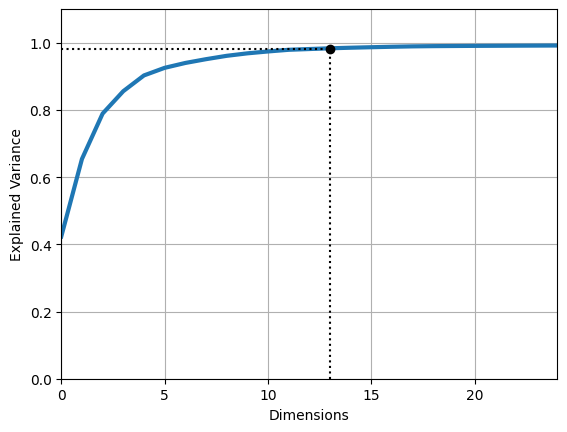

In [57]:
import matplotlib.pyplot as plt

plt.plot(cumsum, linewidth=3)
plt.axis([0, components_evaluation - 1, 0, 1.1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([components_aim, components_aim], [0, variance_aim], "k:")
plt.plot([0, components_aim], [variance_aim, variance_aim], "k:")
plt.plot(components_aim, variance_aim, "ko")
plt.grid(visible=True)
plt.show()

In [58]:
print(
    f"Erklärte Varianz mit {components_evaluation} Komponenten: {np.sum(pca.explained_variance_ratio_)}"
)
print(
    f"Erklärte Varianz mit {components_aim} Komponenten: {np.sum(pca.explained_variance_ratio_[:components_aim])}"
)

Erklärte Varianz mit 25 Komponenten: 0.9916841805573051
Erklärte Varianz mit 13 Komponenten: 0.9812170438120036


### PCA Pipeline Step

In [59]:
num_step_2 = Pipeline(
    steps=[
        ("attr_add", CombinedFeatureAdder()),
        ("std_scaler", StandardScaler()),
    ]
)

In [60]:
prep_steps_2 = ColumnTransformer(
    transformers=[
        ("num", num_step_2, num_features),
        ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), cat_features),
    ],
    remainder="drop",
)

In [61]:
ohe_cols_2 = prep_steps_2.fit_transform(X=train_data).columns.str.startswith("ohe")
ohe_cols_2

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [62]:
ct_pca_2 = ColumnTransformer(
    remainder="passthrough", transformers=[("pca", PCA(n_components=components_aim), ohe_cols_2)]
)

In [63]:
prep_2 = Pipeline(
    steps=[
        ("preprocessing", prep_steps_2),
        ("ct_pca", ct_pca_2),
    ]
)

In [64]:
pipeline_2 = Pipeline(
    steps=[
        ("prep", prep_2),
        ("model", DecisionTreeClassifier(random_state=42, min_samples_split=20)),
    ]
)

In [65]:
pipeline_2.fit(X=train_data[X], y=train_data[y])

Pipeline(steps=[('prep',
                 Pipeline(steps=[('preprocessing',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('attr_add',
                                                                                    CombinedFeatureAdder()),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['kr_durchm',
                                                                    'baumhoehe',
                                                                    'st_durchm',
                                                                    'pflanzjahr']),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False),
                                                                   ['gebiet',
                                                                    'baum_statu'])])),
                                 ('ct_pca',
                                  ColumnTransf...
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True]))]))])),
                ('model',
                 DecisionTreeClassifier(min_samples_split=20,
                                        random_state=42))])

In [66]:
cross_val_score(
    estimator=pipeline_2[-1], X=prep_2.fit_transform(train_data[X]), y=train_data[y], cv=5
)

array([0.37526502, 0.36945426, 0.37098547, 0.37366995, 0.37080372])

Mean accuracy

In [67]:
pipeline_2.score(X=test_data[X], y=test_data[y])

0.3773596758488551

F1 Score

In [68]:
f1_score(y_true=test_data[y], y_pred=pipeline_2.predict(X=test_data[X]), average="macro")

0.26269689752154074